# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [141]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from math import e
import pandas as pd

In [142]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

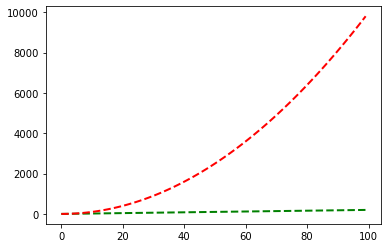

In [143]:
# Method 1
plt.plot(x, y, color='green', linestyle='dashed',linewidth=2)
plt.plot(x,z,color='red',linestyle='dashed',linewidth=2)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

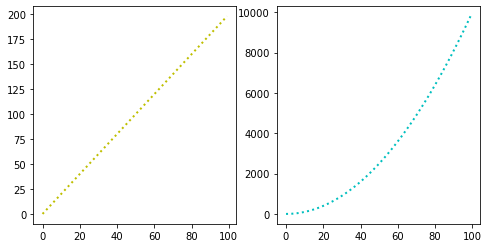

In [144]:
# Method 2
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
ax[0].plot(x, y,':',color='y',linewidth=2)
ax[1].plot(x, z,'k:',color='c',linewidth=2)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

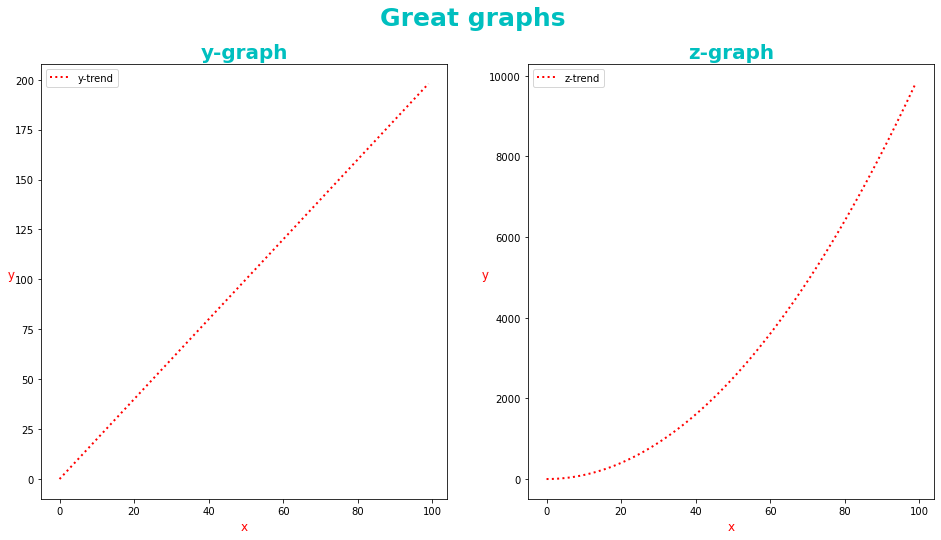

In [145]:
# your code here
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,8))
fig.suptitle('Great graphs', fontsize=25, fontweight='bold', color='c')
ax[0].set_title('y-graph',size=20, color='c',fontweight='bold')
ax[1].set_title('z-graph',size=20, color='c',fontweight='bold')
ax[0].plot(x, y,':',label='y-trend',linewidth=2, color='r')
ax[1].plot(x,z, ':',label='z-trend',linewidth=2, color='r')
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel('x', fontsize = 12, color='r')
ax[1].set_ylabel('y', fontsize = 12, rotation=1,color='r')
ax[0].set_xlabel('x', fontsize = 12,color='r')
ax[0].set_ylabel('y', fontsize = 12, rotation=1,color='r')
plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [146]:
# your code here
𝑦=𝑥**2
z=𝑒**𝑥

Text(0.5, 1.0, 'Logarithmic scale')

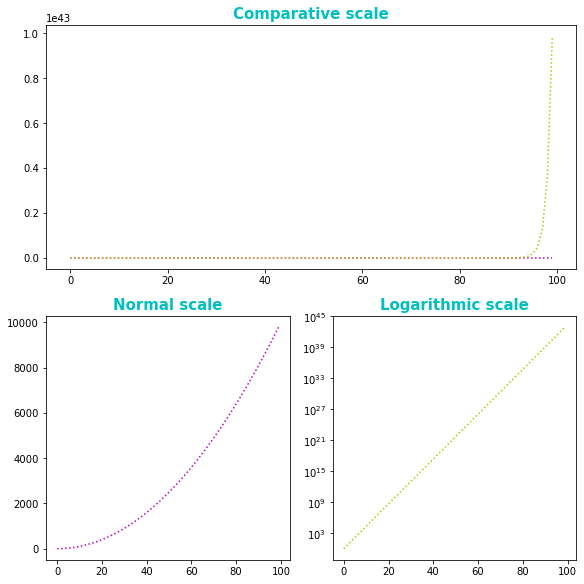

In [147]:
fig3 = plt.figure(constrained_layout=True, figsize=(8,8))
gs = fig3.add_gridspec(2, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('Comparative scale',size=15, color='c',fontweight='bold')
f3_ax1.plot(x,y,':', color='m')
f3_ax1.plot(x,z,':', color='y')
f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax2.plot(x,y,':', color='m')
f3_ax1.set_yscale('linear')
f3_ax2.set_title('Normal scale',size=15, color='c',fontweight='bold')
f3_ax2 = fig3.add_subplot(gs[1, 1])
f3_ax2.plot(x,z,':', color='y')
f3_ax2.set_yscale('log')
f3_ax2.set_title('Logarithmic scale',size=15, color='c',fontweight='bold')

#### As a bonus challenge, try to add a legend to the plot.

Text(0.5, 1.0, 'Logarithmic scale')

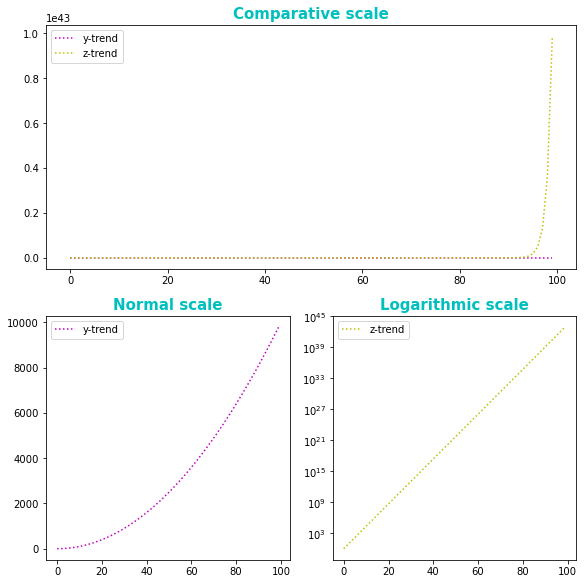

In [149]:
fig3 = plt.figure(constrained_layout=True, figsize=(8,8))
gs = fig3.add_gridspec(2, 2)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('Comparative scale',size=15, color='c',fontweight='bold')
f3_ax1.plot(x,y,':', color='m',label='y-trend')
f3_ax1.legend()
f3_ax1.plot(x,z,':', color='y', label='z-trend')
f3_ax1.legend()
f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax2.plot(x,y,':', color='m',label='y-trend')
f3_ax2.legend()
f3_ax1.set_yscale('linear')
f3_ax2.set_title('Normal scale',size=15, color='c',fontweight='bold')
f3_ax2 = fig3.add_subplot(gs[1, 1])
f3_ax2.plot(x,z,':', color='y',label='z-trend')
f3_ax2.legend()
f3_ax2.set_yscale('log')
f3_ax2.set_title('Logarithmic scale',size=15, color='c',fontweight='bold')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [150]:
# your code here
fitbit=pd.read_csv('../your-code/fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

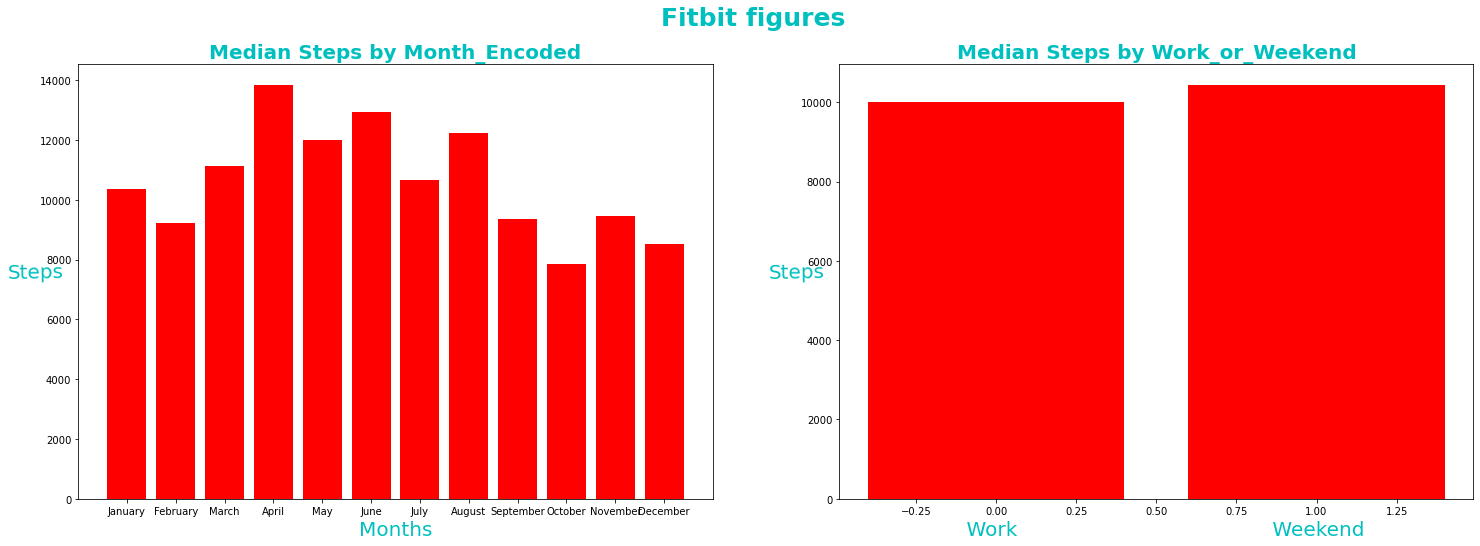

In [215]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
av_steps_by_month=fitbit.groupby("Months").agg("median").sort_values("Months_encoded")[["Steps"]].reset_index()
# MEDIAN STEPS BY WORK_OR_WEEKEND
av_steps_by_work_or_weekend=fitbit.groupby("Work_or_Weekend").agg("median").sort_values("Months_encoded")[["Steps"]].reset_index()
# your code here
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,8))
fig.suptitle('Fitbit figures', fontsize=25, fontweight='bold', color='c')
ax[0].set_title('Median Steps by Month_Encoded',size=20, color='c',fontweight='bold')
ax[1].set_title('Median Steps by Work_or_Weekend',size=20, color='c',fontweight='bold')
steps_m=av_steps_by_month['Steps']
month=av_steps_by_month['Months']
ax[0].bar(month,steps_m,color='r')
steps_w=av_steps_by_work_or_weekend['Steps']
w_w=av_steps_by_work_or_weekend['Work_or_Weekend']
ax[1].bar(w_w,steps_w, color='r')
ax[1].set_xlabel('    Work                                        Weekend ', fontsize = 20, color='c')
ax[1].set_ylabel('Steps', fontsize = 20, rotation=1,color='c')
ax[0].set_xlabel('Months', fontsize = 20,color='c')
ax[0].set_ylabel('Steps', fontsize = 20, rotation=1,color='c')
plt.show();

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

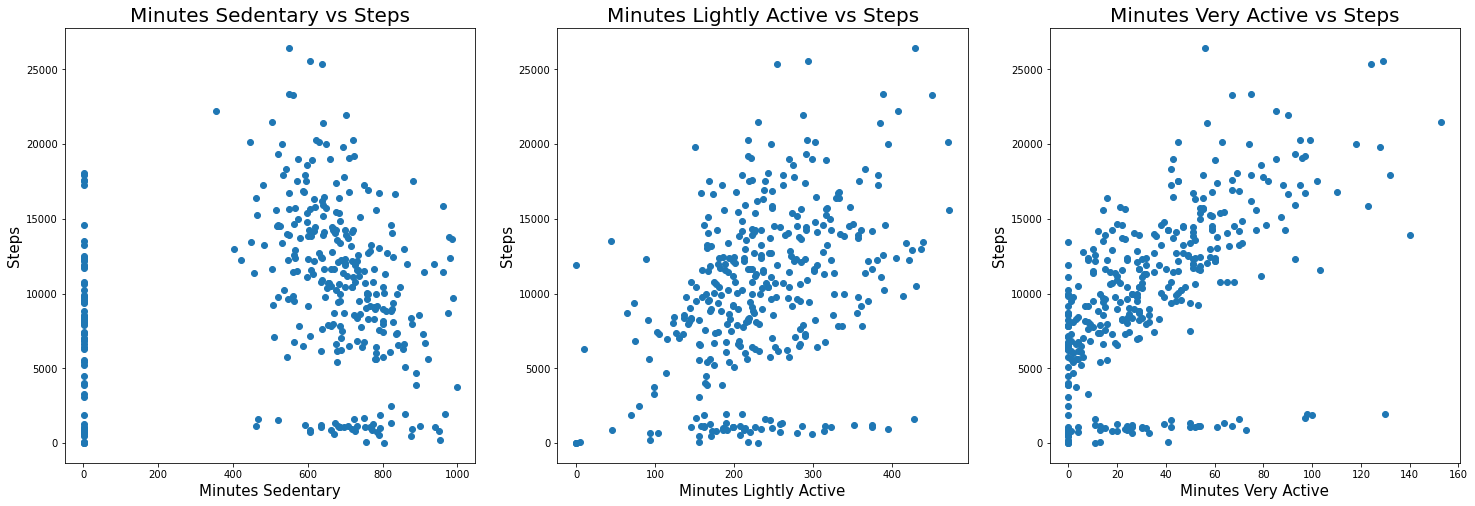

In [278]:
# your code here   
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(25,8))
positions=[0,1,2]
y_col = "Steps"
x_columns = ['Minutes Sedentary', 'Minutes Lightly Active','Minutes Very Active']

for x_col in enumerate(x_columns):
    i=x_col[0]
    x=x_col[1]
    figure = plt.figure
    ax[i].scatter(fitbit[x], fitbit[y_col])
    ax[i].set_ylabel(y_col,fontsize=15)
    ax[i].set_title("{} vs {}".format(x, y_col), size=20)

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [279]:
# your code here
titanic=pd.read_csv('../your-code/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [281]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [285]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('float','int').columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [286]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

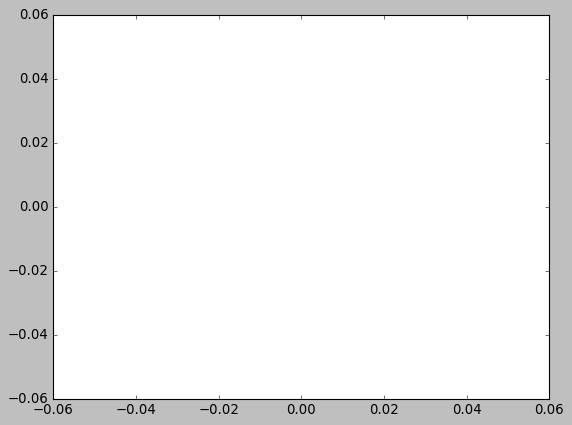

In [298]:
# your code here
fig = plt.plot(ncols=3, nrows=1, figsize=(12,6), style='classic')

#### Use the right visulalization to show the distribution of column `Age`.

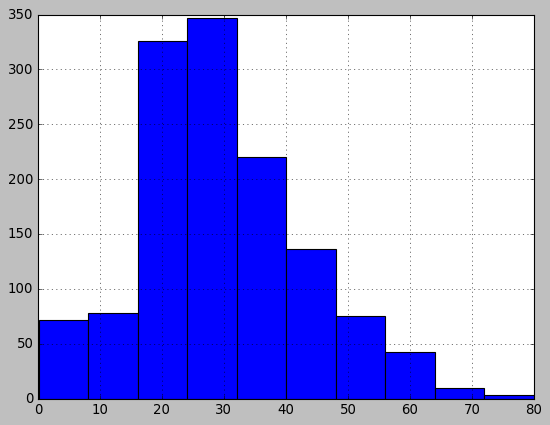

In [299]:
# your code here
titanic['Age'].hist();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

Text(0.5, 1.0, 'Age distribution by 10, 20 and 50 bins')

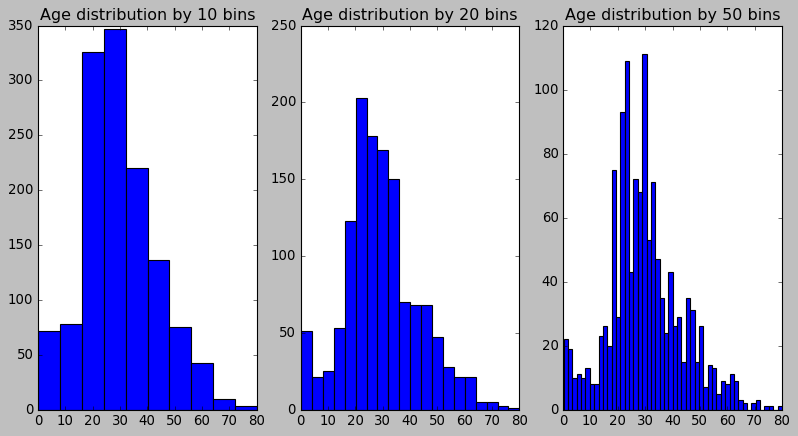

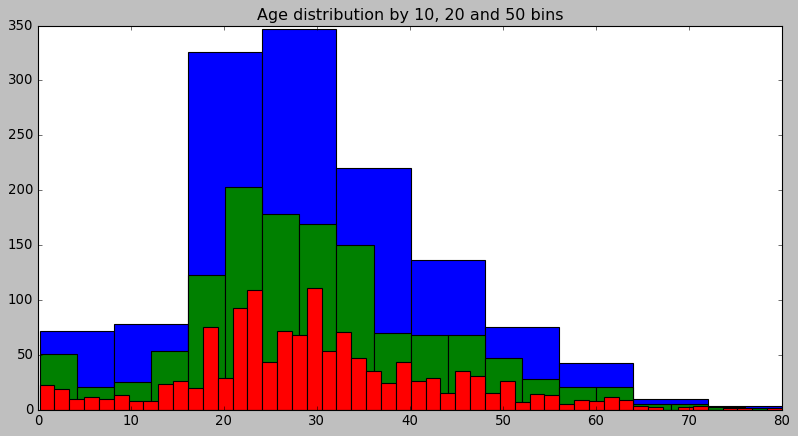

In [316]:
# your code here
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,6))
ax[0].hist(titanic['Age'], bins=10)
ax[1].hist(titanic['Age'], bins=20)
ax[2].hist(titanic['Age'], bins=50)
ax[0].set_title('Age distribution by 10 bins')
ax[1].set_title('Age distribution by 20 bins')
ax[2].set_title('Age distribution by 50 bins')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax.hist(titanic['Age'], bins=10)
ax.hist(titanic['Age'], bins=20)
ax.hist(titanic['Age'], bins=50)
ax.set_title('Age distribution by 10, 20 and 50 bins')

#### How does the bin size affect your plot?

In [317]:
"""
By choosing a bin size you are telling the graph to show you all elements that fall in that bin range. Therefore, if you set a bin of 10 it will slice the dataset in 10 parts, however if you set a bin of 50 it will slice it in 50 parts giving you a better sense of where are the intervals in which data is falling.
"""

'\nBy choosing a bin size you are telling the graph to show you all elements that fall in that bin range. Therefore, if you set a bin of 10 it will slice the dataset in 10 parts, however if you set a bin of 50 it will slice it in 50 parts giving you a better sense of where are the intervals in which data is falling.\n'

#### Use seaborn to show the distribution of column `Age`.

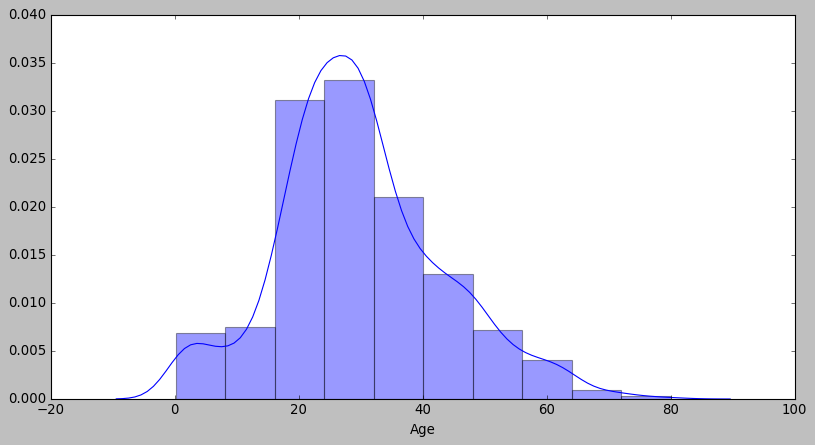

In [321]:
# your code here
fig = plt.figure(figsize=(12, 6))
sns.distplot(titanic['Age'], bins=10);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,6))
ax[0].hist(titanic['Gender'], bins=10)

ValueError: could not convert string to float: 'male'

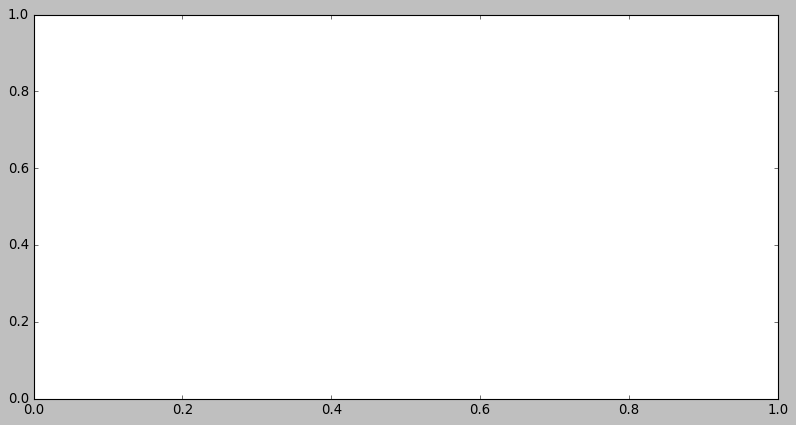

In [322]:
# Method 2 - seaborn
# your code here
fig = plt.figure(figsize=(12, 6))
sns.distplot(titanic['Gender'], bins=10);

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here